# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv("real_estate_price_size_year_view.csv")

In [3]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [4]:
raw_data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [5]:
raw_data.describe(include = 'all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


## Create a dummy variable for 'view'

In [6]:
data = raw_data.copy()

In [7]:
data['view'] = data['view'].map({'Sea view':1, 'No sea view':0})

In [8]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


## Create the regression

### Declare the dependent and the independent variables

In [9]:
y = data['price']
x1 = data[['size', 'year', 'view']]

### Regression

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.02e-50
Time:                        11:47:01   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking the F-statistic and the prob(F-statistic), we see that our overall model is significant
The size, year and dummy(view) variables are significant
The Adjusted R of this model is 0.910, which is a great improvement from what(0.772) we got without view.
The original model without the dummy was:
    price = -5.772000 + 227.7009*size + 2916.7853*year
The model including the dummy variable is:
    price = -5398000 + 223.0316*size + 2718.9489*year + 56730*dummy
Recall that the dummy = 0 or 1. If there is Sea view, dummy = 1; if there is No sea view, dummy = 0
The New Equations wiil be:
    price = -5398000 + 223.0316*size + 2718.9489*year (No sea view)
    price = -5341270 + 223.0316*size + 2718.9489*year (Sea View)

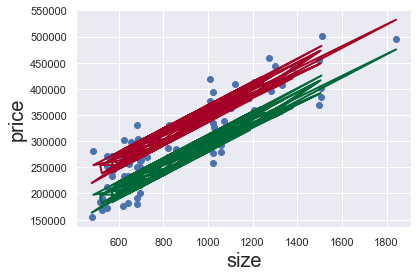

In [14]:
plt.scatter(data['size'], y)
yhat_noseaview = -5398000 + 223.0316*data['size'] + 2718.9489*data['year']
yhat_seaview = -5341270 + 223.0316*data['size'] + 2718.9489*data['year']
fig = plt.plot(data['size'],yhat_noseaview, lw=2, c='#006837')
fig = plt.plot(data['size'],yhat_seaview, lw=2, c='#a50026')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

In this case, we do not plot the regression because it is a 3-D plot.
We usually plot regressions for simple linear regression problems in order to understand the concept of linear regression.
There is no need to plot the multiple linear regression models. The scatter plot is just a visual representation that helps you understand the intuition of the problem. In reality, we are interested in the coefficients and not the graph itself.
We only need regression results table for interpreting the results.

If you want to go ahead with ploting it, then you need to remove one independent variable.

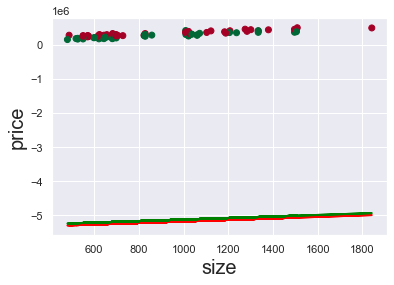

In [20]:
#Using size as the independent variable
plt.scatter(data['size'], y, c=data['view'], cmap='RdYlGn_r')
yhat_noseaview = -5398000 + 223.0316*data['size']
yhat_seaview = -5341270 + 223.0316*data['size']
fig = plt.plot(data['size'],yhat_noseaview, lw=2, c='red')
fig = plt.plot(data['size'],yhat_seaview, lw=2, c='green')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

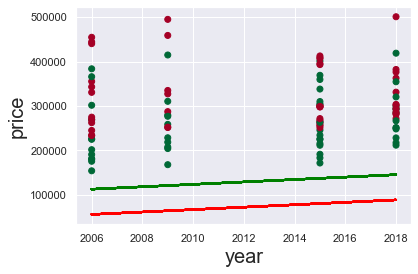

In [22]:
#Using year as the independent variable
plt.scatter(data['year'], y, c=data['view'], cmap='RdYlGn_r')
yhat_noseaview = -5398000 + 2718.9489*data['year']
yhat_seaview = -5341270 + 2718.9489*data['year']
fig = plt.plot(data['year'],yhat_noseaview, lw=2, c='red')
fig = plt.plot(data['year'],yhat_seaview, lw=2, c='green')
plt.xlabel('year', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()